In [53]:
!python data_cleaning.py

In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
df = pd.read_csv('$2$5Zoom_HH_Parsed.csv')

In [56]:
df.head()

,raw_hh,Stack_info,Preflop,Flop,Turn,River,Showdown,Summary,fold_y/n,villain_position,...,raised_y/n,villain_3b_pot_y/n,villain_4b_pot_y/n,hero_3b_pot_y/n,hero_4b_pot_y/n,river_bet_size_percentage,river_bet_predefined_y/n,river_bet_int_y/n,overbet_y/n,should_call
0,PokerStars Hand #3966386570: Hold'em No Limit...,PokerStars Hand #3966386570: Hold'em No Limit...,Dealt to Hero [6h Qh] UTG: folds Dealer: fold...,[5h 4h 8s] Hero: checks Big Blind: checks,[5h 4h 8s] [Qs] Hero: checks Big Blind: checks,[5h 4h 8s Qs] [Tc] Hero: bets $21.38 Big Blin...,UTG: shows [8c 6c] (a hand...) Dealer: shows ...,Total pot $118.12 | Rake $3.00 Board [5h 4h 8...,0,Big Blind,...,1,0,0,0,0,32.5,0,0,0,0
1,PokerStars Hand #3966385841: Hold'em No Limit...,PokerStars Hand #3966385841: Hold'em No Limit...,Dealt to Hero [Kh Js] UTG: folds UTG+1: folds...,[Kc 5h 3c] Hero: checks Dealer: bets $18.16 H...,[Kc 5h 3c] [Th] Hero: checks Dealer: bets $50...,[Kc 5h 3c Th] [9s] Hero: checks Dealer: bets ...,Small Blind: shows [8d Qd] (a hand...) Hero: ...,Total pot $410.46 | Rake $3.00 Board [Kc 5h 3...,0,Dealer,...,0,0,0,0,0,71.7,0,1,0,0
2,PokerStars Hand #3966384457: Hold'em No Limit...,PokerStars Hand #3966384457: Hold'em No Limit...,Dealt to Hero [6h 7c] UTG: folds UTG+1: folds...,[Tc Qc Ac] Small Blind: checks Hero: checks,[Tc Qc Ac] [9d] Small Blind: checks Hero: che...,[Tc Qc Ac 9d] [Ks] Small Blind: bets $5 Hero:...,Small Blind: shows [Kc 6c] (a hand...) Hero: ...,Total pot $30.00 | Rake $1.50 Board [Tc Qc Ac...,1,Small Blind,...,0,0,0,0,0,17.5,0,1,0,0
3,PokerStars Hand #3966382520: Hold'em No Limit...,PokerStars Hand #3966382520: Hold'em No Limit...,Dealt to Hero [Td Ad] UTG: folds Dealer: fold...,[7d 2h 9d] Hero: checks Big Blind: checks,[7d 2h 9d] [Th] Hero: bets $21.38 Big Blind: ...,[7d 2h 9d Th] [8h] Hero: checks Big Blind: be...,UTG: shows [2c Jc] (a hand...) Dealer: shows ...,Total pot $72.76 | Rake $3.00 Board [7d 2h 9d...,1,Big Blind,...,0,0,0,0,0,202.1,0,0,1,1
4,PokerStars Hand #3966380934: Hold'em No Limit...,PokerStars Hand #3966380934: Hold'em No Limit...,Dealt to Hero [Qc Js] UTG: raises $10 to $15 ...,[7d 9h Qs] Hero: checks UTG: bets $23.16 Hero...,[7d 9h Qs] [9s] Hero: checks UTG: bets $41.87...,[7d 9h Qs 9s] [5c] Hero: checks UTG: bets $79...,Small Blind: shows [2s Tc] (a hand...) UTG: s...,Total pot $162.56 | Rake $3.00 Board [7d 9h Q...,1,CO,...,0,0,0,0,0,50.0,1,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   raw_hh                     541 non-null    object 
 1   Stack_info                 541 non-null    object 
 2   Preflop                    541 non-null    object 
 3   Flop                       541 non-null    object 
 4   Turn                       541 non-null    object 
 5   River                      541 non-null    object 
 6   Showdown                   541 non-null    object 
 7   Summary                    541 non-null    object 
 8   fold_y/n                   541 non-null    int64  
 9   villain_position           541 non-null    object 
 10  hero_position              541 non-null    object 
 11  hero_OOP                   541 non-null    int64  
 12  all_in_y/n                 541 non-null    int64  
 13  raised_y/n                 541 non-null    int64  

# EDA

- Histogram of river_bet_size_percentage
- Utilize hue for 'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'river_bet_predefined_y/n', 'river_bet_int_y/n', 'hero_OOP'
- Show percentage of how much I missed out on -> percentage of fold y/n (what actually happened) and should_call (the 'correct' move)
*Note: Caveat for 'correct' because we do not want to be results oriented.  However, for the purposes of this notebook just going to use this as my 'target' variable.

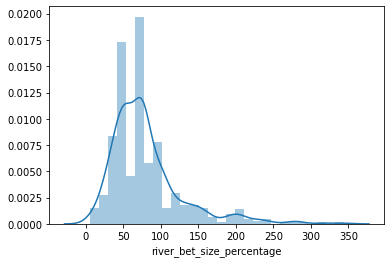

In [58]:
#Plot histogram of different bet/raise sizes employed by villain
sns.distplot(df['river_bet_size_percentage'])

Clearly bimodal.

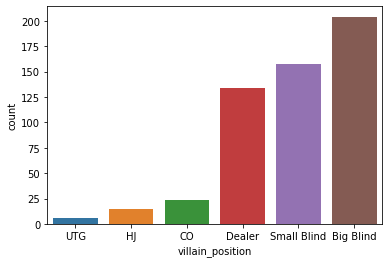

In [60]:
#Different villain positions. 
k = ['UTG', 'HJ', 'CO', 'Dealer', 'Small Blind', 'Big Blind']
sns.countplot(df['villain_position'], order = k)

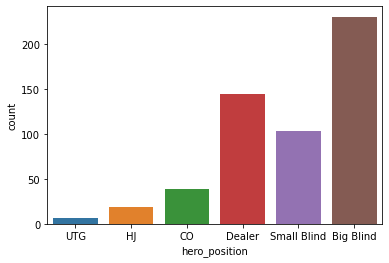

In [61]:
sns.countplot(df['hero_position'], order = k)

In [62]:
df.columns

Index(['raw_hh', 'Stack_info', 'Preflop', 'Flop', 'Turn', 'River', 'Showdown',
       'Summary', 'fold_y/n', 'villain_position', 'hero_position', 'hero_OOP',
       'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n',
       'hero_3b_pot_y/n', 'hero_4b_pot_y/n', 'river_bet_size_percentage',
       'river_bet_predefined_y/n', 'river_bet_int_y/n', 'overbet_y/n',
       'should_call'],
      dtype='object')

In [73]:
df_cat = df[['fold_y/n', 'hero_OOP', 'all_in_y/n', 'raised_y/n', 'villain_3b_pot_y/n', 'villain_4b_pot_y/n', 'hero_3b_pot_y/n', 'hero_4b_pot_y/n',
         'river_bet_predefined_y/n', 'river_bet_int_y/n', 'overbet_y/n', 'should_call']]

fold_y/n


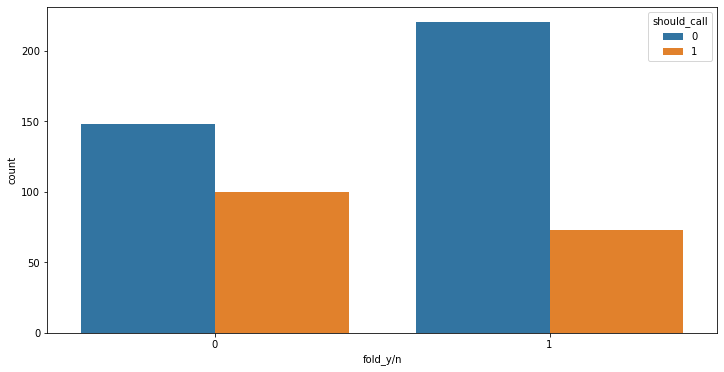

hero_OOP


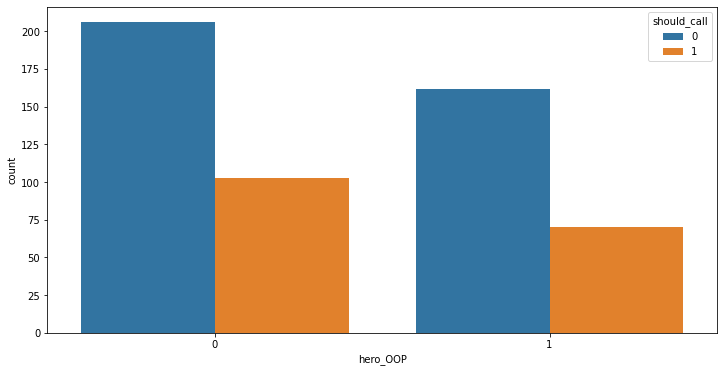

all_in_y/n


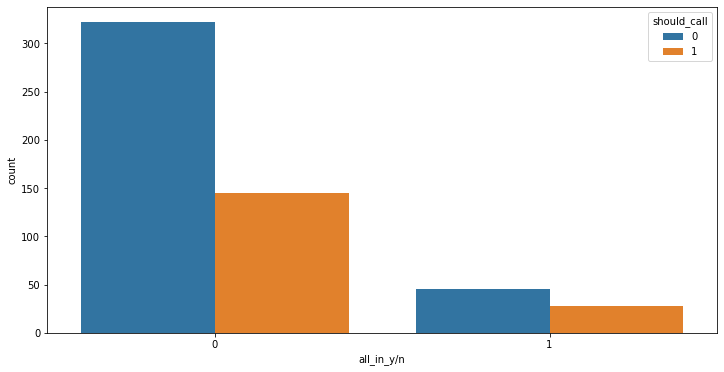

raised_y/n


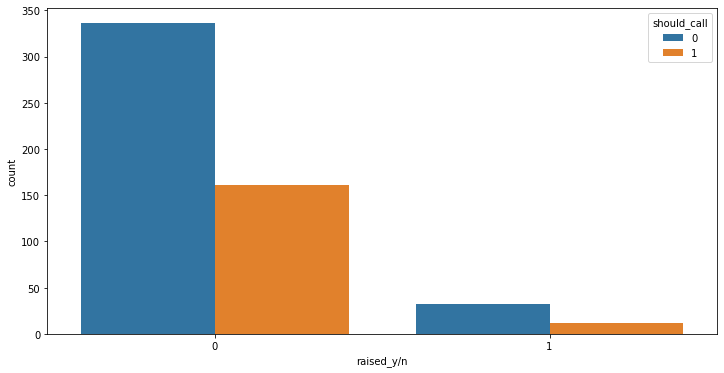

villain_3b_pot_y/n


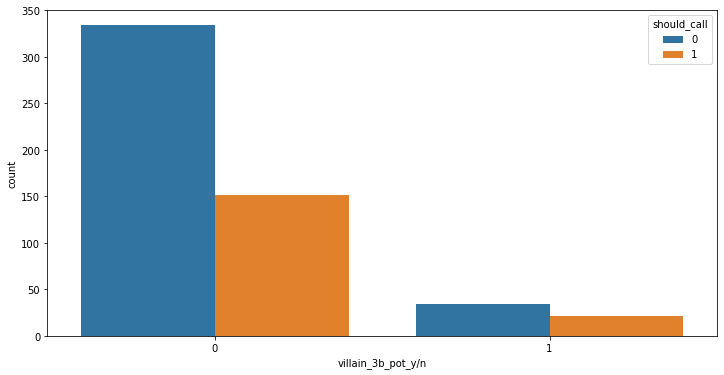

villain_4b_pot_y/n


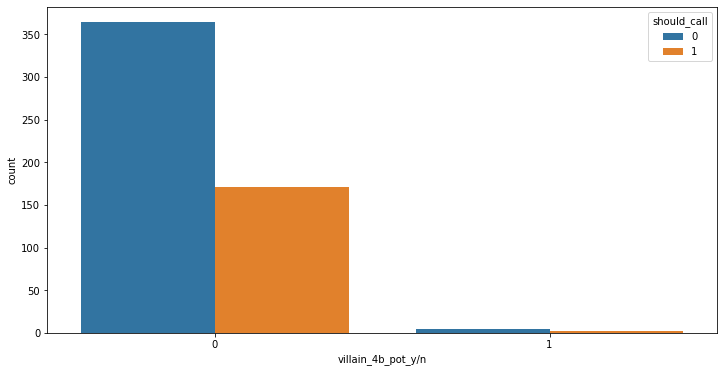

hero_3b_pot_y/n


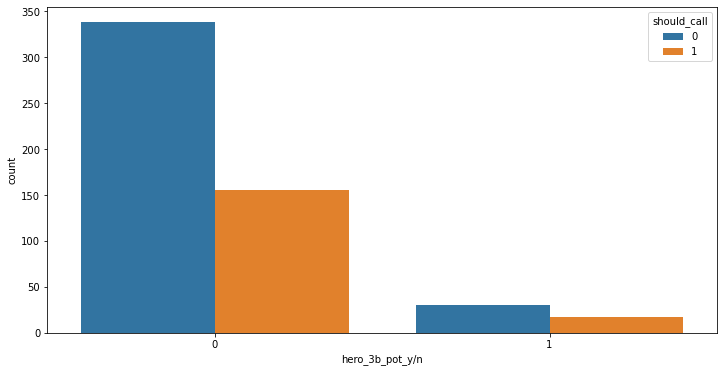

hero_4b_pot_y/n


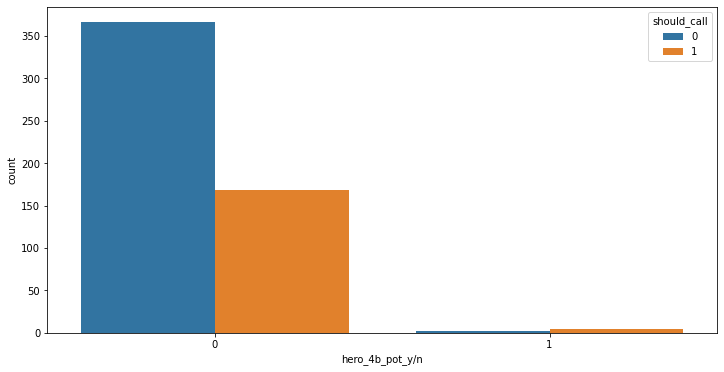

river_bet_predefined_y/n


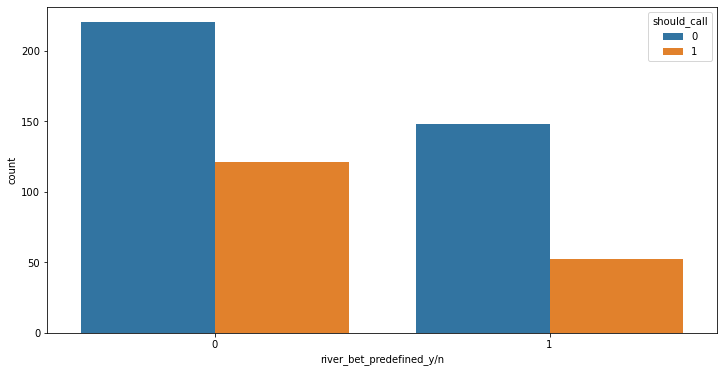

river_bet_int_y/n


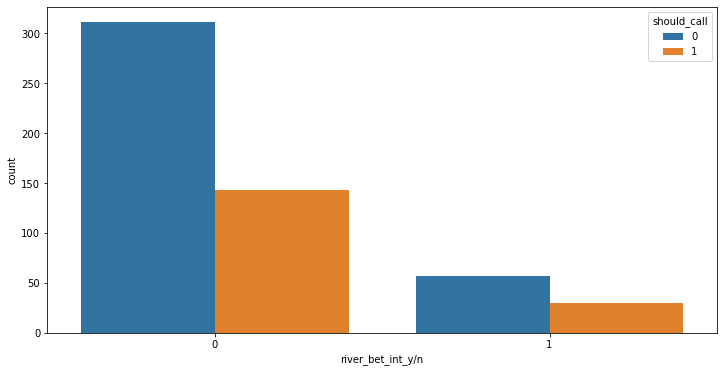

overbet_y/n


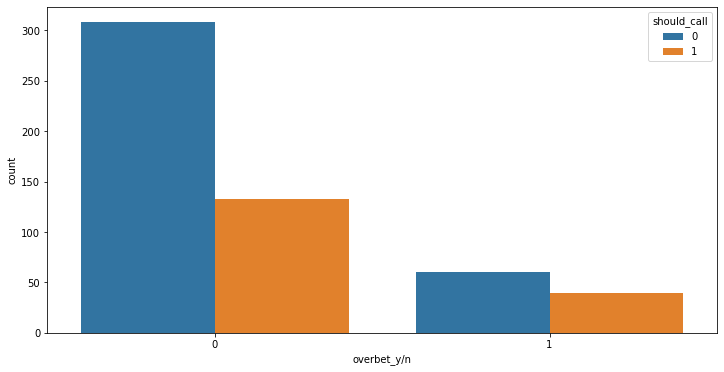

should_call


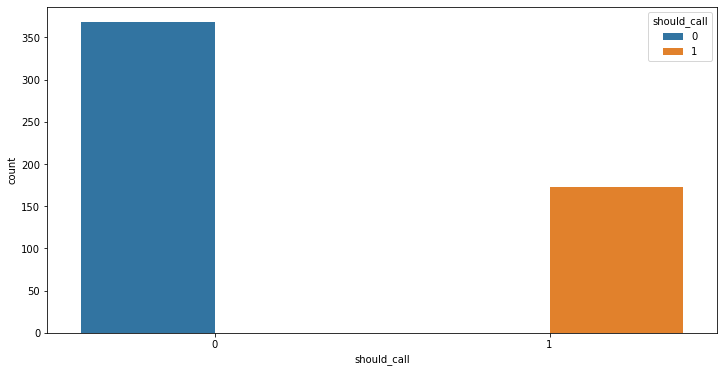

In [74]:
for column in df_cat.columns:
    plt.figure(figsize=(12,6))
    print(column)
    sns.countplot(x = column, hue='should_call', data=df_cat)
    plt.show()

percentages of the hue's?? How to best interpret


# Modeling

My initial thinking is just utilize some sort of logistical regression.